
#  Using merge_asof() to study stocks

##  Assignment 

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, **JP Morgan** (JPM), **Wells Fargo** (WFC), and **Bank Of America** (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis. 

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

##  Pre exercise code 

```
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_bac = 'https://assets.datacamp.com/production/repositories/5486/datasets/c7dc7839ee7bd9afc4768b6d34e60a3551e4e92e/bac.us_5min.p'
fn_jpm = 'https://assets.datacamp.com/production/repositories/5486/datasets/e29e85297606e5e7e95b3adcf5eaf8569566a6af/jpm.us_5min.p'
fn_wfc = 'https://assets.datacamp.com/production/repositories/5486/datasets/33976c90e350979ad5e284d7f6aed0bb607ff828/wfc.us_5min.p'

bac = load(urllib.request.urlopen(fn_bac))
jpm = load(urllib.request.urlopen(fn_jpm))
wells = load(urllib.request.urlopen(fn_wfc))
```



##  Instructions 

- Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the ****nearest**** times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
- Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
- Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.


In [32]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

bac = pd.read_pickle("bac.us_5min.p")
jpm = pd.read_pickle("jpm.us_5min.p")
wells = pd.read_pickle("wfc.us_5min.p")

In [36]:
bac.head()

,date_time,close
0,2017-11-17 15:35:17,26.552
1,2017-11-17 15:40:06,26.552
2,2017-11-17 15:45:05,26.388
3,2017-11-17 15:50:34,26.378
4,2017-11-17 15:55:06,26.383


In [37]:
jpm.head()

,date_time,close
0,2017-11-17 15:35:17,98.1200
1,2017-11-17 15:40:04,98.1800
2,2017-11-17 15:45:01,97.7307
3,2017-11-17 15:50:55,97.7400
4,2017-11-17 15:55:00,97.8150


In [38]:
wells.head()

,date_time,close
0,2017-11-17 15:35:08,54.3227
1,2017-11-17 15:40:00,54.3200
2,2017-11-17 15:45:32,54.1900
3,2017-11-17 15:50:07,54.1700
4,2017-11-17 15:55:00,54.1841


In [41]:
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=["", "_wells"], direction="nearest")

In [42]:
jpm_wells

,date_time,close,close_wells
0,2017-11-17 15:35:17,98.1200,54.3227
1,2017-11-17 15:40:04,98.1800,54.3200
2,2017-11-17 15:45:01,97.7307,54.1900
3,2017-11-17 15:50:55,97.7400,54.1700
4,2017-11-17 15:55:00,97.8150,54.1841
5,2017-11-17 16:00:30,98.0200,54.2650
6,2017-11-17 16:05:07,97.8000,54.2000
7,2017-11-17 16:10:08,97.8400,54.1550
8,2017-11-17 16:15:11,97.7100,54.1900
9,2017-11-17 16:20:29,97.7600,54.2050


In [43]:
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on="date_time", suffixes=["_jpm", "_bac"], direction="nearest")

In [44]:
jpm_wells_bac

,date_time,close_jpm,close_wells,close_bac
0,2017-11-17 15:35:17,98.1200,54.3227,26.552
1,2017-11-17 15:40:04,98.1800,54.3200,26.552
2,2017-11-17 15:45:01,97.7307,54.1900,26.388
3,2017-11-17 15:50:55,97.7400,54.1700,26.378
4,2017-11-17 15:55:00,97.8150,54.1841,26.383
5,2017-11-17 16:00:30,98.0200,54.2650,26.452
6,2017-11-17 16:05:07,97.8000,54.2000,26.373
7,2017-11-17 16:10:08,97.8400,54.1550,26.388
8,2017-11-17 16:15:11,97.7100,54.1900,26.369
9,2017-11-17 16:20:29,97.7600,54.2050,26.388


In [45]:
price_diffs = jpm_wells_bac.diff()

In [49]:
price_diffs

,date_time,close_jpm,close_wells,close_bac
0,NaT,NaN,NaN,NaN
1,0 days 00:04:47,0.0600,-0.0027,0.000
2,0 days 00:04:57,-0.4493,-0.1300,-0.164
3,0 days 00:05:54,0.0093,-0.0200,-0.010
4,0 days 00:04:05,0.0750,0.0141,0.005
5,0 days 00:05:30,0.2050,0.0809,0.069
6,0 days 00:04:37,-0.2200,-0.0650,-0.079
7,0 days 00:05:01,0.0400,-0.0450,0.015
8,0 days 00:05:03,-0.1300,0.0350,-0.019
9,0 days 00:05:18,0.0500,0.0150,0.019


<Axes: xlabel='Date Time', ylabel='Price Change'>

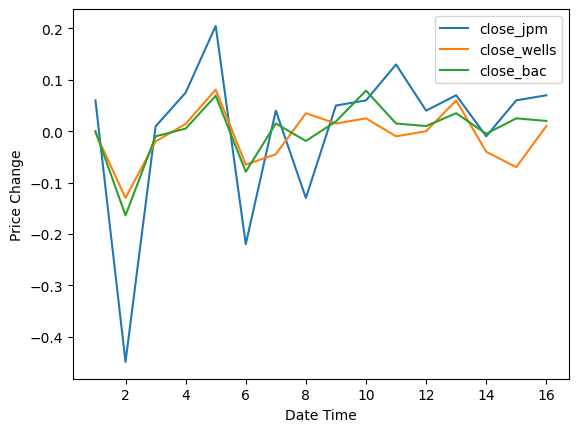

In [53]:
diff_plot = price_diffs.plot(kind="line", y=["close_jpm", "close_wells", "close_bac"])
diff_plot.set_xlabel("Date Time")
diff_plot.set_ylabel("Price Change")
diff_plot